## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from textblob import TextBlob

from sklearn.model_selection import cross_val_score

from pylab import rcParams

rcParams['figure.figsize'] = 18,8

## Reading the datasets

In [2]:
df_budget = pd.read_excel('IAC4-dataDescription.xlsx',sheet_name='budget.tsv')
df_gross_budget = pd.read_excel('IAC4-dataDescription.xlsx',sheet_name='budget_gross.tsv')

print(df_budget.shape)
print(df_gross_budget.shape)

(8468, 19)
(8467, 17)


### Merging the Movies Datasets

In [3]:
df_movies=pd.merge(df_budget,df_gross_budget,on='movie_id',how='left')
df_movies.shape

(8468, 35)

In [4]:
df_movies.columns

Index(['movie_id', 'title', 'plot', 'movie_rating', 'movie_rating.1',
       'metacritic', 'dvd_release', 'production', 'actors', 'movie_votes',
       'poster', 'director', 'release_date', 'runtime', 'genre', 'awards',
       'keywords', 'Budget_x', 'Box Office Gross', 'Budget_y', 'Gross',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [5]:
df_movies=df_movies.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16','Budget_y'])
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 8467
Data columns (total 20 columns):
movie_id            8468 non-null object
title               8468 non-null object
plot                8196 non-null object
movie_rating        5252 non-null object
movie_rating.1      7735 non-null float64
metacritic          5079 non-null float64
dvd_release         5335 non-null datetime64[ns]
production          6758 non-null object
actors              8153 non-null object
movie_votes         7735 non-null float64
poster              7967 non-null object
director            8390 non-null object
release_date        8283 non-null datetime64[ns]
runtime             7846 non-null object
genre               8424 non-null object
awards              5242 non-null object
keywords            6381 non-null object
Budget_x            8468 non-null object
Box Office Gross    8468 non-null object
Gross               2883 non-null object
dtypes: datetime64[ns](2), float64(3), object(15)
memo

### Renaming movie_rating.1 to rating_score

In [6]:
df_movies.rename(columns={'movie_rating.1':'rating_score'},inplace=True)
df_movies.columns

Index(['movie_id', 'title', 'plot', 'movie_rating', 'rating_score',
       'metacritic', 'dvd_release', 'production', 'actors', 'movie_votes',
       'poster', 'director', 'release_date', 'runtime', 'genre', 'awards',
       'keywords', 'Budget_x', 'Box Office Gross', 'Gross'],
      dtype='object')

### Creating Feature - Sentiments from Plot

In [7]:
x=[]

for sentence in df_movies['plot']:
    blob = TextBlob(str(sentence))
    if blob.sentiment.polarity==' ':
        x.append(0)
    else:
        x.append(blob.sentiment.polarity)

In [8]:
df_movies['Plot Sentiment']=x

### Creating Feature - Poster (0/1)

In [9]:
df_movies['poster'].fillna(0,inplace=True)
df_movies['poster']=df_movies['poster'].map(lambda x: 1 if x!=0 else x)

### Creating Feature - From Awards

### Oscar Wins
### Oscar Nominations
### Normal Nominations
### Normal Wins
### GoldenGlobe Nominations
### GoldenGlobe Wins

In [10]:
oscar_wins=[]
oscar_nominations=[]
normal_nominations=[]
normal_wins=[]
goldenglobe_nominations=[]
goldenglobe_wins=[]


for i in df_movies['awards']:
    str(i).strip()
    if str(i).find('wins')>-1:   
        if not i[str(i).find('wins')-4:str(i).find('wins')]:
            normal_wins.append(i[0:str(i).find('wins')])
        else:
            normal_wins.append(i[str(i).find('wins')-4:str(i).find('wins')])
    elif str(i).find('win.')>-1 :
        normal_wins.append(i[str(i).find('win.')-2:str(i).find('win.')])
    elif str(i).find('win')>-1 :
        normal_wins.append(i[str(i).find('win')-2:str(i).find('win')])
    else:
        normal_wins.append(0)
        
        
for i in df_movies['awards']:
    str(i).strip()
    if str(i).find('nominations')>-1:
        if not i[str(i).find('nominations')-3:str(i).find('nominations')]:
            normal_nominations.append(i[0:str(i).find('nominations')])
        else:
            normal_nominations.append(i[str(i).find('nominations')-4:str(i).find('nominations')])
    
    elif str(i).find('nomination.')>-1:
        
        if not i[str(i).find('nomination.')-4:str(i).find('nomination.')]:
            normal_nominations.append(i[0:str(i).find('nomination.')])
        else:    
            normal_nominations.append(i[str(i).find('nomination.')-4:str(i).find('nomination.')])
    else:
        normal_nominations.append(0)

        

for i in df_movies['awards']:

    str(i).strip()
    if str(i).find('Oscar')>-1:
        
        if str(i).find('Nominated')>-1:
            oscar_nominations.append(i[str(i).find('Oscar')-3:str(i).find('Oscar')])
        else:
            oscar_nominations.append(0)
    else:
        oscar_nominations.append(0)
        
for i in df_movies['awards']:
    #print(i)
    str(i).strip()
    if str(i).find('Oscar')>-1:
        if str(i).find('Won')>-1:
            oscar_wins.append(i[str(i).find('Oscar')-3:str(i).find('Oscar')])
        else:
            oscar_wins.append(0)
    else:
        oscar_wins.append(0)
        
for i in df_movies['awards']:
    str(i).strip()
    if str(i).find('Golden Globe')>-1:
        if str(i).find('Won')>-1:
            goldenglobe_wins.append(i[str(i).find('Golden Globe')-3:str(i).find('Golden Globe')])
        else:
            goldenglobe_wins.append(0)
            
    elif str(i).find('Golden Globes')>-1:
        if str(i).find('Won')>-1:
            goldenglobe_wins.append(i[str(i).find('Golden Globes')-3:str(i).find('Golden Globes')])
        else: 
            goldenglobe_wins.append(0)
    else:
        goldenglobe_wins.append(0)
    
    
for i in df_movies['awards']:
    str(i).strip()
    if str(i).find('Golden Globe')>-1:
        if str(i).find('Nominated')>-1:
            goldenglobe_nominations.append(i[str(i).find('Golden Globe')-3:str(i).find('Golden Globe')])
        else: 
            goldenglobe_nominations.append(0)
            
    elif str(i).find('Golden Globes')>-1:
        if str(i).find('Nominated')>-1:
            goldenglobe_nominations.append(i[str(i).find('Golden Globes')-3:str(i).find('Golden Globes')])
        else: 
            goldenglobe_nominations.append(0)
    else:
        goldenglobe_nominations.append(0)
        
        
df_movies['Oscar_Won']=oscar_wins
df_movies['Oscar_Nominations']=oscar_nominations
df_movies['Normal_Wins']=normal_wins
df_movies['Normal_Nominations']=normal_nominations
df_movies['GoldenGlobe_Nominations']= goldenglobe_nominations
df_movies['GoldenGlobe_Wins']=goldenglobe_wins

### Pre-processing and imputing the features created from Awards

In [11]:
df_movies['Normal_Nominations']=df_movies['Normal_Nominations'].map(lambda x: str(x).strip())
df_movies['Normal_Nominations']=df_movies['Normal_Nominations'].map(lambda x: str(x)[1:] if str(x).startswith('&') else x)
df_movies['Normal_Nominations']=df_movies['Normal_Nominations'].map(lambda x: str(x)[1:] if str(x).startswith('r') else x)

df_movies['Normal_Wins']=df_movies['Normal_Wins'].map(lambda x: str(x).strip())
df_movies['Normal_Wins']=df_movies['Normal_Wins'].map(lambda x: str(x)[1:] if str(x).startswith('r') else x)

df_movies['Oscar_Won']=pd.to_numeric(df_movies['Oscar_Won'])
df_movies['Oscar_Nominations']=pd.to_numeric(df_movies['Oscar_Nominations'])
df_movies['Normal_Wins']=pd.to_numeric(df_movies['Normal_Wins'])
df_movies['Normal_Nominations']=pd.to_numeric(df_movies['Normal_Nominations'])
df_movies['GoldenGlobe_Nominations']= pd.to_numeric(df_movies['GoldenGlobe_Nominations'])
df_movies['GoldenGlobe_Wins']=pd.to_numeric(df_movies['GoldenGlobe_Wins'])

### Creating Feature - Earning Days

In [12]:
if df_movies['dvd_release'] is None:
    df_movies['Earning Days']=(dt.datetime.now()-df_movies['release_date']).dt.days
else:   
    df_movies['Earning Days']=(df_movies['dvd_release']-df_movies['release_date']).dt.days

### Creating Features - Release Year, Release Month and Release DayOf Week

In [13]:
df_movies['Release Day Of Week']=df_movies['release_date'].dt.dayofweek
df_movies['Release Month'] = df_movies['release_date'].dt.month
df_movies['Release Year'] = df_movies['release_date'].dt.year
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 8467
Data columns (total 31 columns):
movie_id                   8468 non-null object
title                      8468 non-null object
plot                       8196 non-null object
movie_rating               5252 non-null object
rating_score               7735 non-null float64
metacritic                 5079 non-null float64
dvd_release                5335 non-null datetime64[ns]
production                 6758 non-null object
actors                     8153 non-null object
movie_votes                7735 non-null float64
poster                     8468 non-null int64
director                   8390 non-null object
release_date               8283 non-null datetime64[ns]
runtime                    7846 non-null object
genre                      8424 non-null object
awards                     5242 non-null object
keywords                   6381 non-null object
Budget_x                   8468 non-null object
Box Office 

### Creating Feature - Same Day Movies

In [14]:
df_movies['release_date']=df_movies['release_date'].astype('str')
df_movies['release_date'].replace('NaT','Not Given',inplace=True)

m=[]

for i in list(df_movies['release_date']):
    m.append(list(df_movies['release_date']).count(i))

In [15]:
df_movies['Same Day Movies']=m

### Creating new features for :-

### Different Actors
### Different Directors
### Genres - Primary, Secondary, Tertiary

In [16]:
actor=df_movies['actors'].str.split(',',expand=True)
actor.rename(columns={0:'Actor1',1:'Actor2',2:'Actor3',3:'Actor4'},inplace=True)
df_movies=df_movies.join(actor)

genre=df_movies['genre'].str.split(',',expand=True)
genre.rename(columns={0:'Primary Genre',1:'Secondary Genre',2:'Tertiary Genre'},inplace=True)
df_movies=df_movies.join(genre)

director=df_movies['director'].str.split(',',expand=True)
director.rename(columns={0:'Director'},inplace=True)
df_movies=df_movies.join(director['Director'])

df_movies.head()

,movie_id,title,plot,movie_rating,rating_score,metacritic,dvd_release,production,actors,movie_votes,...,Release Year,Same Day Movies,Actor1,Actor2,Actor3,Actor4,Primary Genre,Secondary Genre,Tertiary Genre,Director
0,tt0010323,The Cabinet of Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",UNRATED,8.1,NaN,1997-10-15,Rialto Pictures,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",42583.0,...,1921.0,1,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,Fantasy,Horror,Mystery,Robert Wiene
1,tt0052893,Hiroshima Mon Amour,A French actress filming an anti-war film in H...,NOT RATED,8.0,NaN,2003-06-24,Rialto Pictures,"Emmanuelle Riva, Eiji Okada, Stella Dassas, Pi...",21154.0,...,1960.0,1,Emmanuelle Riva,Eiji Okada,Stella Dassas,Pierre Barbaud,Drama,Romance,None,Alain Resnais
2,tt0058898,Alphaville,A U.S. secret agent is sent to the distant spa...,NOT RATED,7.2,NaN,1998-10-20,Rialto Pictures,"Eddie Constantine, Anna Karina, Akim Tamiroff",17801.0,...,1965.0,1,Eddie Constantine,Anna Karina,Akim Tamiroff,None,Drama,Mystery,Sci-Fi,Jean-Luc Godard
3,tt0074252,"Ugly, Dirty and Bad",Four generations of a family live crowded toge...,NaN,7.9,NaN,2016-11-01,Compagnia Cinematografica Champion,"Nino Manfredi, Maria Luisa Santella, Francesco...",5705.0,...,1976.0,1,Nino Manfredi,Maria Luisa Santella,Francesco Anniballi,Maria Bosco,Comedy,Drama,None,Ettore Scola
4,tt0084269,Losing Ground,A comedy-drama about a Black American female p...,NaN,6.3,NaN,NaT,Milestone Film & Video,"Billie Allen, Gary Bolling, Clarence Branch Jr...",132.0,...,1982.0,1,Billie Allen,Gary Bolling,Clarence Branch Jr.,Joe Garcia,Comedy,Drama,None,Kathleen Collins


In [17]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 8467
Data columns (total 40 columns):
movie_id                   8468 non-null object
title                      8468 non-null object
plot                       8196 non-null object
movie_rating               5252 non-null object
rating_score               7735 non-null float64
metacritic                 5079 non-null float64
dvd_release                5335 non-null datetime64[ns]
production                 6758 non-null object
actors                     8153 non-null object
movie_votes                7735 non-null float64
poster                     8468 non-null int64
director                   8390 non-null object
release_date               8468 non-null object
runtime                    7846 non-null object
genre                      8424 non-null object
awards                     5242 non-null object
keywords                   6381 non-null object
Budget_x                   8468 non-null object
Box Office Gross   

### Dropping unnecessary columns

In [18]:
df_movies=df_movies.drop(columns=['plot','dvd_release','actors','director','release_date','genre','awards'],axis=1)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 8467
Data columns (total 33 columns):
movie_id                   8468 non-null object
title                      8468 non-null object
movie_rating               5252 non-null object
rating_score               7735 non-null float64
metacritic                 5079 non-null float64
production                 6758 non-null object
movie_votes                7735 non-null float64
poster                     8468 non-null int64
runtime                    7846 non-null object
keywords                   6381 non-null object
Budget_x                   8468 non-null object
Box Office Gross           8468 non-null object
Gross                      2883 non-null object
Plot Sentiment             8468 non-null float64
Oscar_Won                  8468 non-null int64
Oscar_Nominations          8468 non-null int64
Normal_Wins                8468 non-null int64
Normal_Nominations         8434 non-null float64
GoldenGlobe_Nominations    8

## Visualizing missing values and imputing Null Values

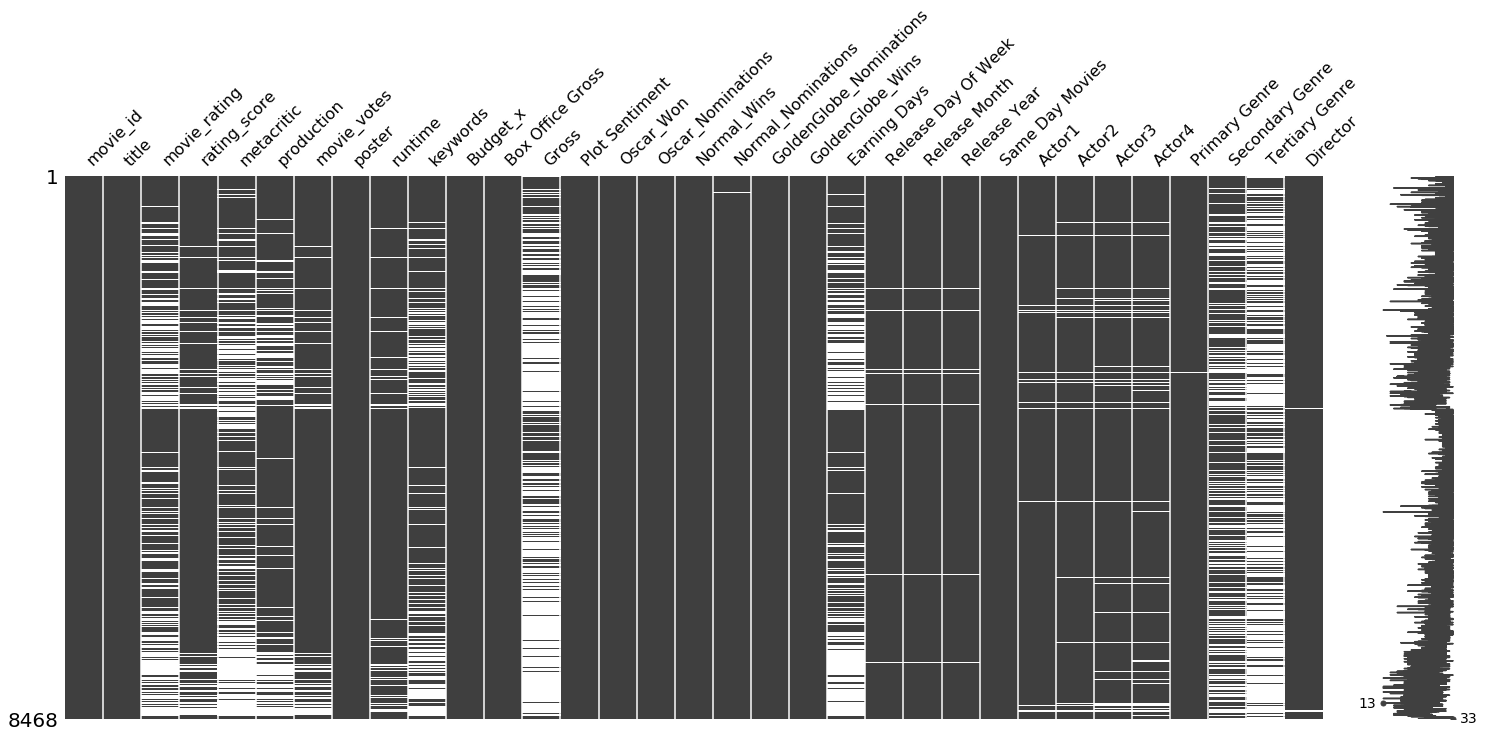

In [19]:
msno.matrix(df_movies)

In [20]:
def nulls(df):
    nulls = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['null_percent'])
    #sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
    return nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

In [21]:
nulls(df_movies)

,null_percent
Gross,65.95
Tertiary Genre,57.46
metacritic,40.02
movie_rating,37.98
Earning Days,37.26
Secondary Genre,27.00
keywords,24.65
production,20.19
Actor4,9.00
movie_votes,8.66


### Imputing Rating_score

6.31115707821591
6.4


D:\Program Data\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


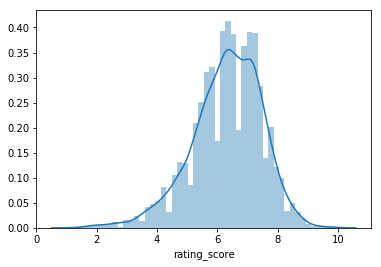

In [22]:
sns.distplot(df_movies['rating_score'].dropna())
print(df_movies['rating_score'].mean())
print(df_movies['rating_score'].median())

In [23]:
df_movies['rating_score']=df_movies['rating_score'].fillna(df_movies['rating_score'].mean())

### Imputing movie_votes

D:\Program Data\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


34865.721008403365
2920.0


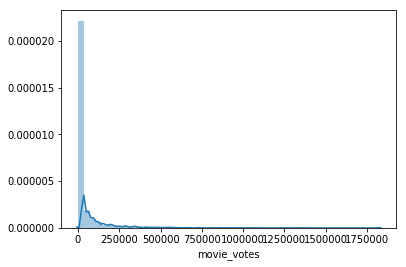

In [24]:
sns.distplot(df_movies['movie_votes'].dropna())
print(df_movies['movie_votes'].mean())
print(df_movies['movie_votes'].median())

In [25]:
df_movies['movie_votes']=df_movies['movie_votes'].fillna(df_movies['movie_votes'].median())

### Imputing metacritic

D:\Program Data\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


55.749163221106514
56.0


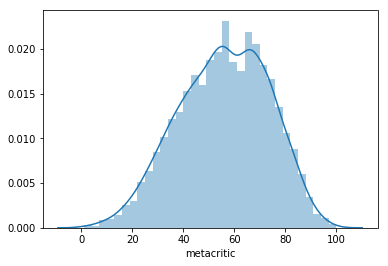

In [26]:
sns.distplot(df_movies['metacritic'].dropna())
print(df_movies['metacritic'].mean())
print(df_movies['metacritic'].median())

In [27]:
df_movies['metacritic']=df_movies['metacritic'].fillna(df_movies['metacritic'].mean())

### Imputing movie_rating

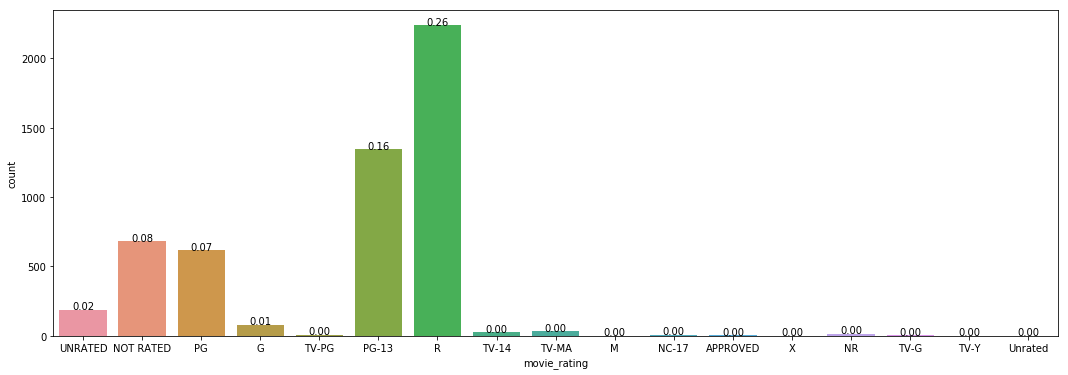

In [28]:
plt.figure(figsize=(18,6))
ax=sns.countplot(df_movies['movie_rating'].dropna())
total = float(len(df_movies['movie_rating']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center")

In [29]:
df_movies['movie_rating']=df_movies['movie_rating'].fillna('R')

### Imputing Director

In [30]:
df_movies['Director']=df_movies['Director'].fillna('Director Not Known')

### Processing and Imputing runtime

In [31]:
df_movies['runtime']=df_movies['runtime'].map(lambda x:str(x)[0:-3].strip())


102.12235534030079
99.0


D:\Program Data\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


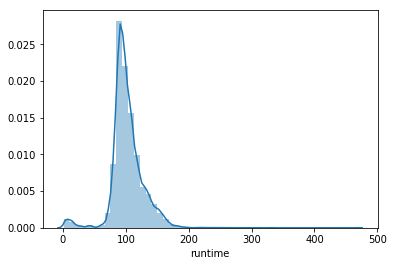

In [32]:
df_movies['runtime']=pd.to_numeric(df_movies['runtime'])
sns.distplot(df_movies['runtime'].dropna())
print(df_movies['runtime'].mean())
print(df_movies['runtime'].median())

In [33]:
df_movies['runtime']=df_movies['runtime'].fillna(df_movies['runtime'].median())

### Rechecking missing values

In [34]:
nulls(df_movies)

,null_percent
Gross,65.95
Tertiary Genre,57.46
Earning Days,37.26
Secondary Genre,27.00
keywords,24.65
production,20.19
Actor4,9.00
Actor3,7.30
Actor2,5.61
Actor1,3.72


### Imputing Actors,Productions,Normal_Nominations and Primary_Genre

In [35]:
df_movies['Actor1']=df_movies['Actor1'].fillna('No Actor')
df_movies['Actor2']=df_movies['Actor2'].fillna('No Actor')
df_movies['Actor3']=df_movies['Actor3'].fillna('No Actor')
df_movies['Actor4']=df_movies['Actor4'].fillna('No Actor')

df_movies['production']=df_movies['production'].fillna('No Production')

df_movies['Normal_Nominations']=df_movies['Normal_Nominations'].fillna(np.mean(df_movies['Normal_Nominations']))

In [36]:
df_movies['Primary Genre'].value_counts()

Comedy         1935
Drama          1780
Action         1295
Documentary    1289
Crime           382
Horror          346
Animation       302
Biography       283
Adventure       264
Short           241
Thriller        104
Romance          60
Mystery          32
Fantasy          31
Family           28
Sci-Fi           25
Musical          10
Western           6
History           3
Sport             3
Music             3
War               1
News              1
Name: Primary Genre, dtype: int64

In [37]:
df_movies['Primary Genre']=df_movies['Primary Genre'].fillna('Others')
df_movies['Secondary Genre']=df_movies['Primary Genre'].fillna('No Genre')
df_movies['Tertiary Genre']=df_movies['Primary Genre'].fillna('No Genre')

### Rechecking missing values

In [38]:
nulls(df_movies)

,null_percent
Gross,65.95
Earning Days,37.26
keywords,24.65
Release Day Of Week,2.18
Release Month,2.18
Release Year,2.18


In [39]:
df_movies['Release Day Of Week'].value_counts()

4.0    5666
3.0     894
2.0     730
5.0     318
1.0     317
6.0     186
0.0     172
Name: Release Day Of Week, dtype: int64

In [40]:
df_movies['Release Day Of Week']=df_movies['Release Day Of Week'].fillna(4.0)

In [41]:
df_movies['Release Month'].value_counts()

4.0     826
10.0    823
9.0     806
3.0     740
8.0     703
5.0     701
1.0     680
6.0     658
11.0    628
7.0     599
2.0     586
12.0    533
Name: Release Month, dtype: int64

In [42]:
df_movies['Release Month']=df_movies['Release Month'].fillna(np.random.choice([4,10,9]))

In [43]:
df_movies['Release Year'].value_counts()

2016.0    1199
2015.0    1068
2014.0     893
2017.0     815
2013.0     704
2012.0     623
2011.0     551
2009.0     462
2008.0     447
2010.0     430
2007.0     117
2018.0      81
2006.0      57
2004.0      48
1999.0      46
2003.0      45
1998.0      45
2005.0      42
2000.0      42
2019.0      40
1997.0      37
2001.0      37
1994.0      36
1996.0      34
1995.0      33
2002.0      33
1990.0      30
1993.0      30
1991.0      28
1992.0      24
          ... 
1986.0      13
1984.0      13
1981.0      13
1980.0      13
1988.0      12
1985.0       9
2021.0       5
1979.0       5
1978.0       3
1960.0       2
1975.0       2
1963.0       2
1972.0       2
1970.0       2
1953.0       1
1921.0       1
1950.0       1
1967.0       1
2025.0       1
1964.0       1
2024.0       1
1917.0       1
1977.0       1
1937.0       1
1976.0       1
1954.0       1
1974.0       1
1971.0       1
1965.0       1
1936.0       1
Name: Release Year, Length: 65, dtype: int64

In [44]:
df_movies['Release Year']=df_movies['Release Year'].fillna(np.random.choice([2015,2016]))

In [45]:
df_movies['Earning Days']=df_movies['Earning Days'].fillna(np.mean(df_movies['Earning Days']))

### Rechecking for missing values

In [46]:
nulls(df_movies)

,null_percent
Gross,65.95
keywords,24.65


In [47]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 8467
Data columns (total 33 columns):
movie_id                   8468 non-null object
title                      8468 non-null object
movie_rating               8468 non-null object
rating_score               8468 non-null float64
metacritic                 8468 non-null float64
production                 8468 non-null object
movie_votes                8468 non-null float64
poster                     8468 non-null int64
runtime                    8468 non-null float64
keywords                   6381 non-null object
Budget_x                   8468 non-null object
Box Office Gross           8468 non-null object
Gross                      2883 non-null object
Plot Sentiment             8468 non-null float64
Oscar_Won                  8468 non-null int64
Oscar_Nominations          8468 non-null int64
Normal_Wins                8468 non-null int64
Normal_Nominations         8468 non-null float64
GoldenGlobe_Nominations    

### Dropping keywords as keywords have nothing to do with Profitability

In [48]:
df_movies=df_movies.drop(columns=['keywords'],axis=1)
nulls(df_movies)

,null_percent
Gross,65.95


### Processing and Imputing Budget_X

In [49]:
df_movies['Budget_x']=df_movies['Budget_x'].map(lambda x: str(x).replace(',',''))

df_movies['Budget_x USD'] = df_movies['Budget_x'].str.replace('([A-Z]+)', '')
df_movies['Budget_x Currency'] = df_movies['Budget_x'].str.extract('([A-Z]+)')

In [50]:
df_movies['Budget_x Currency'].value_counts()

CAD    2
EU     1
Name: Budget_x Currency, dtype: int64

In [51]:
df_movies['Budget_x Currency']=df_movies['Budget_x Currency'].fillna('USD')

In [52]:
df_movies['Budget_x USD']=pd.to_numeric(df_movies['Budget_x USD'])

In [53]:
df_movies['Budget_x USD']=np.where(df_movies['Budget_x Currency']=='CAD',df_movies['Budget_x USD']*0.75,df_movies['Budget_x USD'])
df_movies['Budget_x USD']=np.where(df_movies['Budget_x Currency']=='EU',df_movies['Budget_x USD']*1.13,df_movies['Budget_x USD'])

### Processing and imputing Box Office Gross

In [54]:
df_movies['Box Office Gross']=np.where(df_movies['Box Office Gross'].str.startswith('<'),'0',df_movies['Box Office Gross'])
df_movies['Box Office Gross']=np.where(df_movies['Box Office Gross'].str.startswith('F'),'0',df_movies['Box Office Gross'])
df_movies['Box Office Gross']=np.where(df_movies['Box Office Gross'].str.startswith('W'),'0',df_movies['Box Office Gross'])

df_movies['Box Office Gross']=df_movies['Box Office Gross'].map(lambda x: str(x).replace(',',''))

In [55]:
df_movies['Box Office Gross USD'] = df_movies['Box Office Gross'].str.replace('([A-Z]+)', '')
df_movies['Box Office Currency'] = df_movies['Box Office Gross'].str.extract('([A-Z]+)')

In [56]:
df_movies['Box Office Currency'].value_counts()

EU     153
GBP     93
Name: Box Office Currency, dtype: int64

In [57]:
df_movies['Box Office Currency']=df_movies['Box Office Currency'].fillna('USD')

In [58]:
df_movies['Box Office Gross USD']=pd.to_numeric(df_movies['Box Office Gross USD'])

In [59]:
df_movies['Box Office Gross USD']=np.where(df_movies['Box Office Currency']=='GBP',df_movies['Box Office Gross USD']*1.32,df_movies['Box Office Gross USD'])
df_movies['Box Office Gross USD']=np.where(df_movies['Box Office Currency']=='EU',df_movies['Box Office Gross USD']*1.13,df_movies['Box Office Gross USD'])

### Dropping Columns Box Office Currency and Budget_x Currency

In [60]:
df_movies=df_movies.drop(columns=['Box Office Currency','Budget_x Currency','Budget_x','Box Office Gross'],axis=1)
df_movies.head()

,movie_id,title,movie_rating,rating_score,metacritic,production,movie_votes,poster,runtime,Gross,...,Actor1,Actor2,Actor3,Actor4,Primary Genre,Secondary Genre,Tertiary Genre,Director,Budget_x USD,Box Office Gross USD
0,tt0010323,The Cabinet of Dr. Caligari,UNRATED,8.1,55.749163,Rialto Pictures,42583.0,1,67.0,NaN,...,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,Fantasy,Fantasy,Fantasy,Robert Wiene,18000.0,0.0
1,tt0052893,Hiroshima Mon Amour,NOT RATED,8.0,55.749163,Rialto Pictures,21154.0,1,90.0,NaN,...,Emmanuelle Riva,Eiji Okada,Stella Dassas,Pierre Barbaud,Drama,Drama,Drama,Alain Resnais,88300.0,0.0
2,tt0058898,Alphaville,NOT RATED,7.2,55.749163,Rialto Pictures,17801.0,1,99.0,46585,...,Eddie Constantine,Anna Karina,Akim Tamiroff,No Actor,Drama,Drama,Drama,Jean-Luc Godard,220000.0,0.0
3,tt0074252,"Ugly, Dirty and Bad",R,7.9,55.749163,Compagnia Cinematografica Champion,5705.0,1,115.0,NaN,...,Nino Manfredi,Maria Luisa Santella,Francesco Anniballi,Maria Bosco,Comedy,Comedy,Comedy,Ettore Scola,6590.0,0.0
4,tt0084269,Losing Ground,R,6.3,55.749163,Milestone Film & Video,132.0,1,86.0,NaN,...,Billie Allen,Gary Bolling,Clarence Branch Jr.,Joe Garcia,Comedy,Comedy,Comedy,Kathleen Collins,0.0,0.0


In [61]:
nulls(df_movies)

,null_percent
Gross,65.95


In [62]:
df_movies=df_movies.drop(columns=['Gross'],axis=1)
df_movies.rename(columns={'Budget_x USD':'Budget'},inplace=True)

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 8467
Data columns (total 31 columns):
movie_id                   8468 non-null object
title                      8468 non-null object
movie_rating               8468 non-null object
rating_score               8468 non-null float64
metacritic                 8468 non-null float64
production                 8468 non-null object
movie_votes                8468 non-null float64
poster                     8468 non-null int64
runtime                    8468 non-null float64
Plot Sentiment             8468 non-null float64
Oscar_Won                  8468 non-null int64
Oscar_Nominations          8468 non-null int64
Normal_Wins                8468 non-null int64
Normal_Nominations         8468 non-null float64
GoldenGlobe_Nominations    8468 non-null int64
GoldenGlobe_Wins           8468 non-null int64
Earning Days               8468 non-null float64
Release Day Of Week        8468 non-null float64
Release Month              

In [63]:
df_movies.head()

,movie_id,title,movie_rating,rating_score,metacritic,production,movie_votes,poster,runtime,Plot Sentiment,...,Actor1,Actor2,Actor3,Actor4,Primary Genre,Secondary Genre,Tertiary Genre,Director,Budget,Box Office Gross USD
0,tt0010323,The Cabinet of Dr. Caligari,UNRATED,8.1,55.749163,Rialto Pictures,42583.0,1,67.0,0.000000,...,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,Fantasy,Fantasy,Fantasy,Robert Wiene,18000.0,0.0
1,tt0052893,Hiroshima Mon Amour,NOT RATED,8.0,55.749163,Rialto Pictures,21154.0,1,90.0,0.083333,...,Emmanuelle Riva,Eiji Okada,Stella Dassas,Pierre Barbaud,Drama,Drama,Drama,Alain Resnais,88300.0,0.0
2,tt0058898,Alphaville,NOT RATED,7.2,55.749163,Rialto Pictures,17801.0,1,99.0,-0.075000,...,Eddie Constantine,Anna Karina,Akim Tamiroff,No Actor,Drama,Drama,Drama,Jean-Luc Godard,220000.0,0.0
3,tt0074252,"Ugly, Dirty and Bad",R,7.9,55.749163,Compagnia Cinematografica Champion,5705.0,1,115.0,0.005682,...,Nino Manfredi,Maria Luisa Santella,Francesco Anniballi,Maria Bosco,Comedy,Comedy,Comedy,Ettore Scola,6590.0,0.0
4,tt0084269,Losing Ground,R,6.3,55.749163,Milestone Film & Video,132.0,1,86.0,-0.055556,...,Billie Allen,Gary Bolling,Clarence Branch Jr.,Joe Garcia,Comedy,Comedy,Comedy,Kathleen Collins,0.0,0.0


In [64]:
cat = []

for i in df_movies.columns:
    if df_movies[i].dtype == 'O':
        cat.append(i)

In [65]:
cat.extend(['Release Day Of Week', 'Release Month', 'Release Year'])

In [66]:
cat

['movie_id',
 'title',
 'movie_rating',
 'production',
 'Actor1',
 'Actor2',
 'Actor3',
 'Actor4',
 'Primary Genre',
 'Secondary Genre',
 'Tertiary Genre',
 'Director',
 'Release Day Of Week',
 'Release Month',
 'Release Year']

In [67]:
df_movies['title'] = df_movies['title'].apply(lambda x: str(x))

In [68]:
train_data = df_movies[df_movies['Box Office Gross USD'] != 0]

test_data = df_movies[df_movies['Box Office Gross USD'] == 0]

In [71]:
!pip install category_encoders
le = LabelEncoder()

train = train_data.copy()
test = test_data.copy()

for i in cat:
    print("Encoding",i)
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['movie_rating','rating_score'])

encoder.fit(train)
train = encoder.transform(train)

encoder.fit(test)
test = encoder.transform(test)

Encoding movie_id
Encoding title
Encoding movie_rating
Encoding production
Encoding Actor1
Encoding Actor2
Encoding Actor3
Encoding Actor4
Encoding Primary Genre
Encoding Secondary Genre
Encoding Tertiary Genre
Encoding Director
Encoding Release Day Of Week
Encoding Release Month
Encoding Release Year


You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [72]:
#df_movies['Box Office Gross USD'] = df_movies['Box Office Gross USD']\
#.apply(lambda x: df_movies['Box Office Gross USD'].mean() if x==0 else x)

## Model Preparation

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error,r2_score

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
train.head()

,movie_id,title,movie_rating,rating_score,metacritic,production,movie_votes,poster,runtime,Plot Sentiment,...,Actor1,Actor2,Actor3,Actor4,Primary Genre,Secondary Genre,Tertiary Genre,Director,Budget,Box Office Gross USD
139,38,82,1,1,65.0,103,358750.0,1,146.0,-0.100000,...,19,59,162,78,1,1,1,50,0.0,198000000.0
496,88,29,2,2,82.0,49,1673.0,1,114.0,0.000000,...,28,119,195,11,7,7,7,97,0.0,660000.0
621,96,218,2,3,76.0,24,4133.0,1,117.0,0.024716,...,66,186,15,84,4,4,4,117,0.0,11300000.0
756,108,174,1,4,29.0,60,419.0,1,85.0,0.500000,...,92,33,206,12,4,4,4,178,0.0,3051000.0
786,112,167,3,5,85.0,32,33478.0,1,93.0,0.078125,...,39,18,117,66,2,2,2,208,0.0,5989000.0


In [97]:
#X = df_movies.drop(['Box Office Gross USD','Budget'],axis=1)
#y = df_movies['Box Office Gross USD']

X = train.drop(['Box Office Gross USD'],axis=1)
y = np.log1p(train['Box Office Gross USD'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
def score(clf, x_tr = X_train, y_tr = y_train, x_tst = X_test, y_tst = y_test,imp = True):
    
    clf.fit(x_tr,y_tr)
    
    pred = clf.predict(x_tst)
    
    print("R-Squared is:\t",r2_score(y_tst,pred))
    print("\n" + "*"*50+"\n")
    print("RMSE:\t",np.sqrt(mean_squared_error(y_tst,pred)))
    
    if imp == True:
        feat_imp = pd.DataFrame(clf.feature_importances_,index=X.columns,columns=['Feature Importance'])
        top_feat = feat_imp.sort_values('Feature Importance',ascending=False).index[0:10]
    
        print("\n" + "*"*50+"\n")
        print("Top 10 most important features:\n",top_feat)
        print("\n" + "*"*50+"\n")
        print("Feature Importances:\n",feat_imp)
        
        return feat_imp
        
        
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [79]:
rf = RandomForestRegressor(n_estimators=1500)
dtree = DecisionTreeRegressor()
adb = AdaBoostRegressor(n_estimators=1500)
br = BaggingRegressor(n_estimators=1500)
gbr = GradientBoostingRegressor(n_estimators=1500)
xgb = XGBRegressor(n_estimators=1500)
lgbm = LGBMRegressor(n_estimators=1500)

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [80]:
models = [{'label': 'Random Forest', 'model': rf}, {'label': 'Decision Tree', 'model': dtree}, 
          {'label': 'Adaboost', 'model': adb}, {'label': 'Bagging Regressor', 'model': br}, 
          {'label': 'Gradient Boosting Regressor', 'model': gbr}, {'label': 'XGBoost', 'model': xgb}, 
          {'label': 'Light GBM', 'model': lgbm}, {'label': 'Linear Regression', 'model': lr}, 
          {'label': 'Lasso', 'model': lasso}, {'label': 'Ridge', 'model': ridge}]

In [81]:
rmse_dict = {}
r2_dict = {}
for m in models:
      
    print("Training and calculating metrics for",m['label'])
    print()
    if m['label'] == 'XGBoost':
        score(m['model'],x_tr=np.array(X_train),y_tr=np.array(y_train).reshape(-1,1),x_tst=np.array(X_test),
              y_tst=np.array(y_test).reshape(-1,1),imp=False)
        rmse_dict[m['label']] = rmse_cv(m['model']).mean()
        r2_dict[m['label']] = r2_score(y_test,m['model'].predict(np.array(X_test)))
    else:
        score(m['model'],imp=False)
        rmse_dict[m['label']] = rmse_cv(m['model']).mean()
        r2_dict[m['label']] = r2_score(y_test,m['model'].predict(X_test))
    print("\n"+"*"*50+"\n")

Training and calculating metrics for Random Forest

R-Squared is:	 0.7749578518278947

**************************************************

RMSE:	 1.5486783177085444

**************************************************

Training and calculating metrics for Decision Tree

R-Squared is:	 0.34557751068548315

**************************************************

RMSE:	 2.6409391419708093

**************************************************

Training and calculating metrics for Adaboost

R-Squared is:	 0.7644915853712377

**************************************************

RMSE:	 1.584282044363886

**************************************************

Training and calculating metrics for Bagging Regressor

R-Squared is:	 0.7767946316675517

**************************************************

RMSE:	 1.5423452612855801

**************************************************

Training and calculating metrics for Gradient Boosting Regressor

R-Squared is:	 0.7339859574542564

****************************

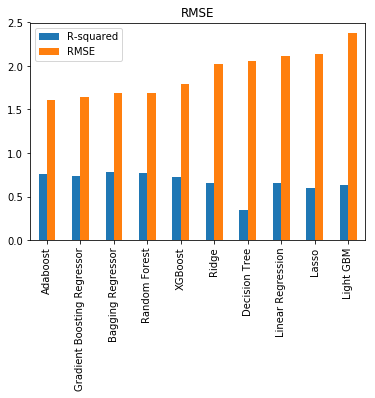

In [82]:
rmse = pd.DataFrame(pd.Series(rmse_dict,index=rmse_dict.keys()),columns=['RMSE'])
r2 = pd.DataFrame(pd.Series(r2_dict,index=r2_dict.keys()),columns=['R-squared'])

results = pd.concat([r2,rmse],axis=1).sort_values(by='RMSE')
results.plot.bar(legend = True, title = 'RMSE')

In [83]:
pred_gross = br.predict(test.drop(['Box Office Gross USD','Budget'],axis=1))

In [84]:
test_data['Box Office Gross USD'] = np.expm1(pred_gross)

D:\Program Data\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
final_data = pd.concat([train_data,test_data])

final_data.to_csv('final_data.csv')

In [100]:
feat_imp = score(adb)

R-Squared is:	 0.763220131503663

**************************************************

RMSE:	 1.5885528686408883

**************************************************

Top 10 most important features:
 Index(['poster', 'movie_id', 'Primary Genre', 'Tertiary Genre',
       'Secondary Genre', 'runtime', 'title', 'Same Day Movies',
       'Release Day Of Week', 'Normal_Nominations'],
      dtype='object')

**************************************************

Feature Importances:
                          Feature Importance
movie_id                           0.110397
title                              0.049152
movie_rating                       0.012020
rating_score                       0.005916
metacritic                         0.015143
production                         0.006261
movie_votes                        0.037516
poster                             0.149390
runtime                            0.061798
Plot Sentiment                     0.005489
Oscar_Won                          0.00

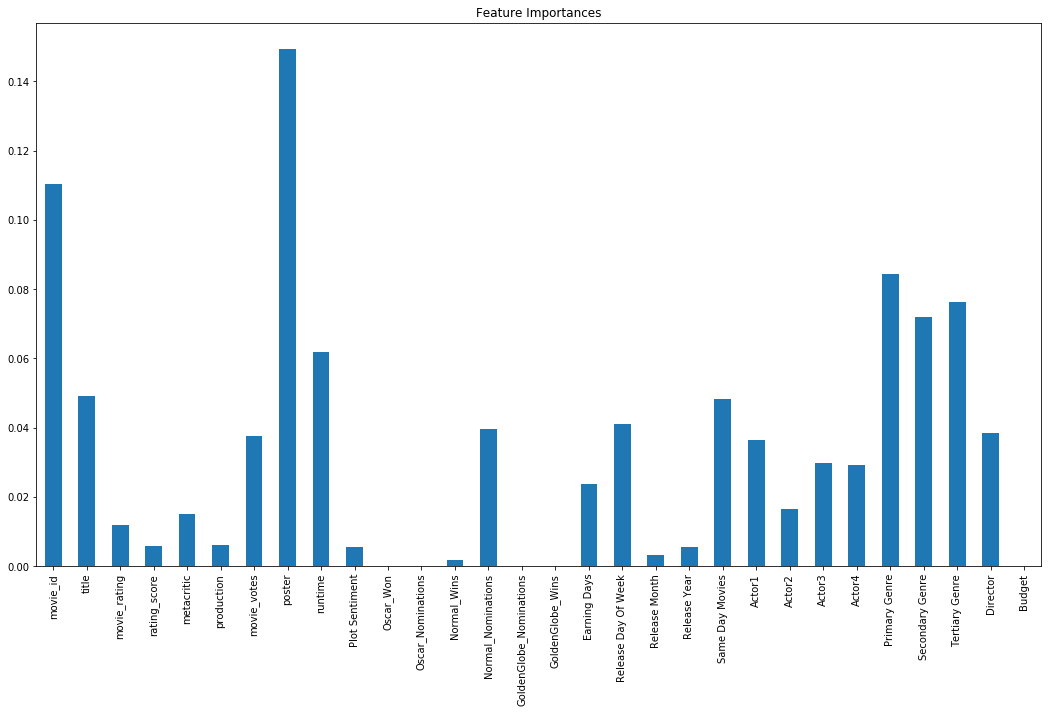

In [101]:
from pylab import rcParams

rcParams['figure.figsize'] = 18,10
feat_imp.plot.bar(title="Feature Importances",legend=False)